### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Load Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv('Online Retail.csv')

Check dataset details

In [5]:
df.shape

(541909, 8)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Remove missing values from the dataset

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(406829, 8)

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Explore & Visualize Dataset

Number of Unique customers

In [11]:
len(df.CustomerID.unique())

4372

Geograhic information

In [12]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

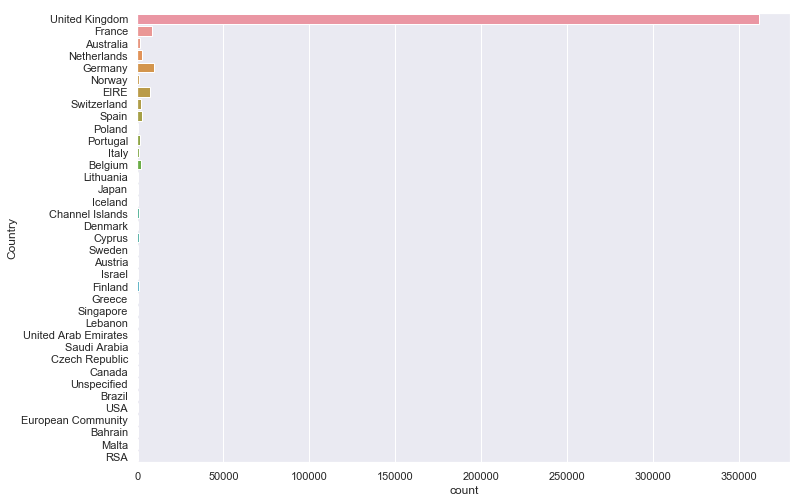

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='Country', data=df)

Lets remove Non-UK records as enough Geographic details about other countries/region is not available.

In [15]:
df = df[df.Country.isin(['United Kingdom'])]

In [16]:
df.shape

(361878, 8)

In [17]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

Number of Unique Products

In [18]:
len(df.StockCode.unique())

3661

Invoice Date Range

In [19]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

### Remove Invoices for 'Returns'

Number of Returned invoices

In [20]:
df.InvoiceNo.str.startswith('C').sum()

7533

Remove these invoices from the dataset

In [21]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [22]:
df.shape

(354345, 8)

### Build a Customer Dataset

In [23]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

In [24]:
cust_df.columns

Index(['CustomerID'], dtype='object')

### Recency of Purchase

In [25]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [27]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})

In [28]:
recency_df.shape

(3921, 2)

In [29]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [30]:
cust_df.shape

(3921, 2)

In [31]:
cust_df

,CustomerID,Recency
0,17850.0,372
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25
5,14688.0,7
6,17809.0,16
7,15311.0,0
8,16098.0,87
9,18074.0,373


### Frequency of Invoices

In [32]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'count'})

In [33]:
frequency_df.shape

(3921, 2)

In [34]:
frequency_df

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
5,12821.0,6
6,12822.0,46
7,12823.0,5
8,12824.0,25
9,12826.0,91


In [35]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [36]:
cust_df.shape

(3921, 3)

In [37]:
cust_df

,CustomerID,Recency,InvoiceNo
0,17850.0,372,297
1,13047.0,31,172
2,13748.0,95,28
3,15100.0,333,3
4,15291.0,25,103
5,14688.0,7,327
6,17809.0,16,61
7,15311.0,0,2379
8,16098.0,87,67
9,18074.0,373,13


### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [38]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [39]:
monetary_df =  df.groupby('CustomerID', as_index=False).agg({'Sales':'sum'})

In [40]:
monetary_df

,CustomerID,Sales
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
5,12821.0,92.72
6,12822.0,948.88
7,12823.0,1759.50
8,12824.0,397.12
9,12826.0,1474.72


In [41]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [42]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales
0,17850.0,372,297,5391.21
1,13047.0,31,172,3237.54
2,13748.0,95,28,948.25
3,15100.0,333,3,876.00
4,15291.0,25,103,4668.30
5,14688.0,7,327,5630.87
6,17809.0,16,61,5411.91
7,15311.0,0,2379,60767.90
8,16098.0,87,67,2005.63
9,18074.0,373,13,489.60
